In [ ]:
%pip install seaborn

Matplotlib is building the font cache; this may take a moment.


Accuracy: 0.97847533632287

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



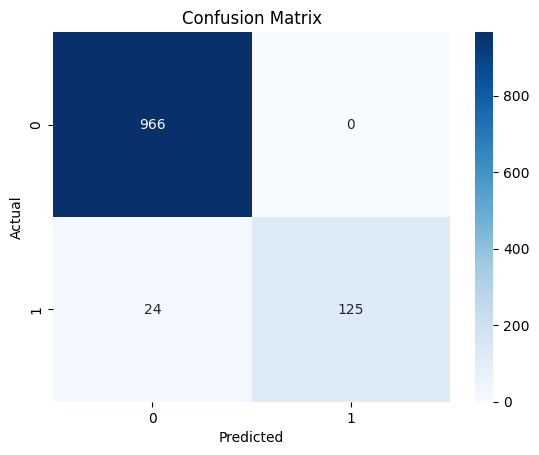

Prediction: Ham


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load dataset from public URL
df = pd.read_csv("sms.tsv", sep='\t', header=None, names=['label', 'message'])
# If you are able to work online on jupyter notebook use the below url no need for the sms.tsv file# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'#df = pd.read_csv(url, sep='	', header=None, names=['label', 'message'])

# Preview
df.head()
# Encode target labels (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Separate features and target
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
msg = ["Congratulations! You've won a free ticket to Delhi. Call now!"]
msg_vec = vectorizer.transform(msg)

prediction = model.predict(msg_vec)
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")